<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriging: TFM Tools </font>
</div>

- **Fecha**: 2023/06/29
        
- **Objetivos**: Programas desarrollados para la realización del TFM
- **Descripción** Tutorial for determining how it works

- **Autores**: 
    - Luis Miguel Sánchez Brea
    - Luis Blas Braunschweig Leotte

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [3]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 160
rcParams['lines.markersize']=10
# rcParams['image.cmap']='hot'
rcParams['figure.figsize']=(6,6)

%matplotlib inline
#%matplotlib widget


In [4]:

from phyton_kriging import np, plt
import cv2
from PIL import Image
from phyton_kriging.variogram_1D import experimental, theoretical, fitting
from phyton_kriging.standard_1D import kriging1D
from phyton_kriging.variogram_2D import experimental
import scipy
from scipy.spatial import distance

from phyton_kriging.utils_math import nearest, nearest2

# Reconstrucción de parte del Background

Pretendemos quitar una zona del background y que gracias al kriging rehagamos la imagen

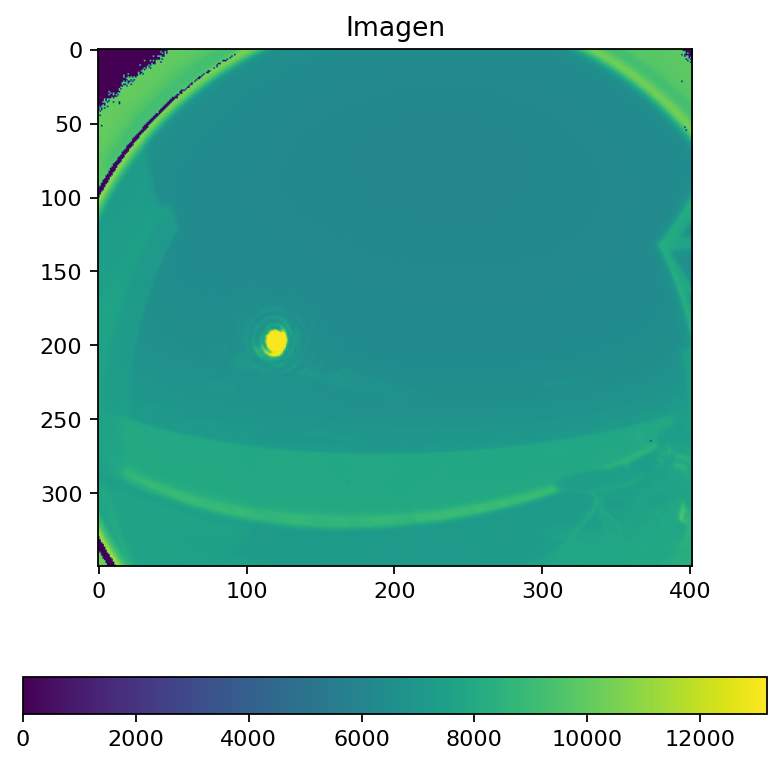

In [8]:
im = Image.open('imagenes_fondo/frame_2min.tiff')
imarray = np.array(im)
imarray[imarray>2**14]=imarray[imarray>2**14]-[2**16-2**14]
imarray=imarray[50:400,639+78:639+460+20] #cojo el canal que quiero
cielosunny=imarray[50:70,200:220]
num_y_cielo_sunny,num_x_cielo_sunny=np.shape(cielosunny)



plt.figure()
plt.imshow(imarray)
plt.colorbar(location='bottom')
plt.title('Imagen')



num_y_2,num_x_2=np.shape(imarray)

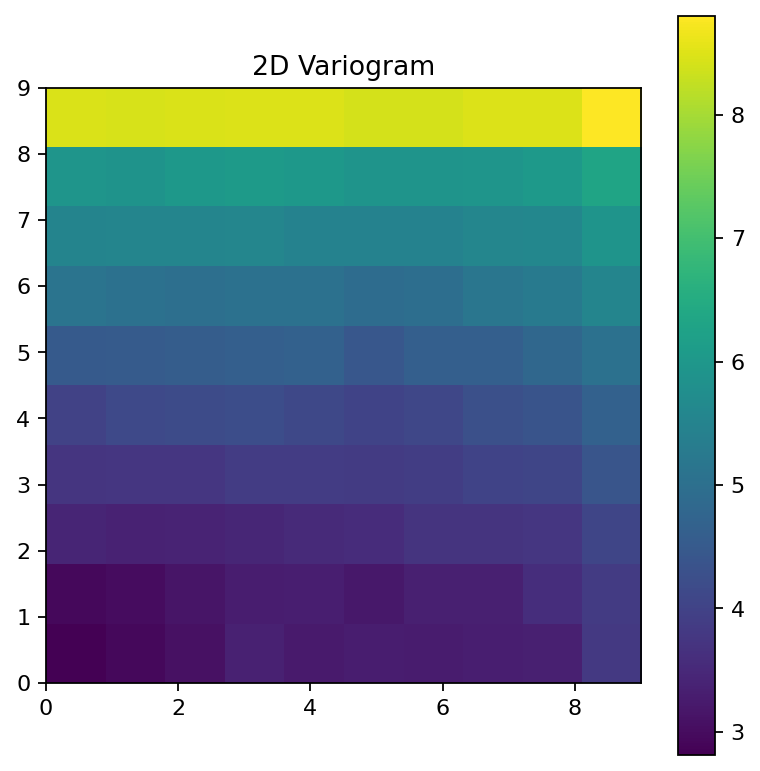

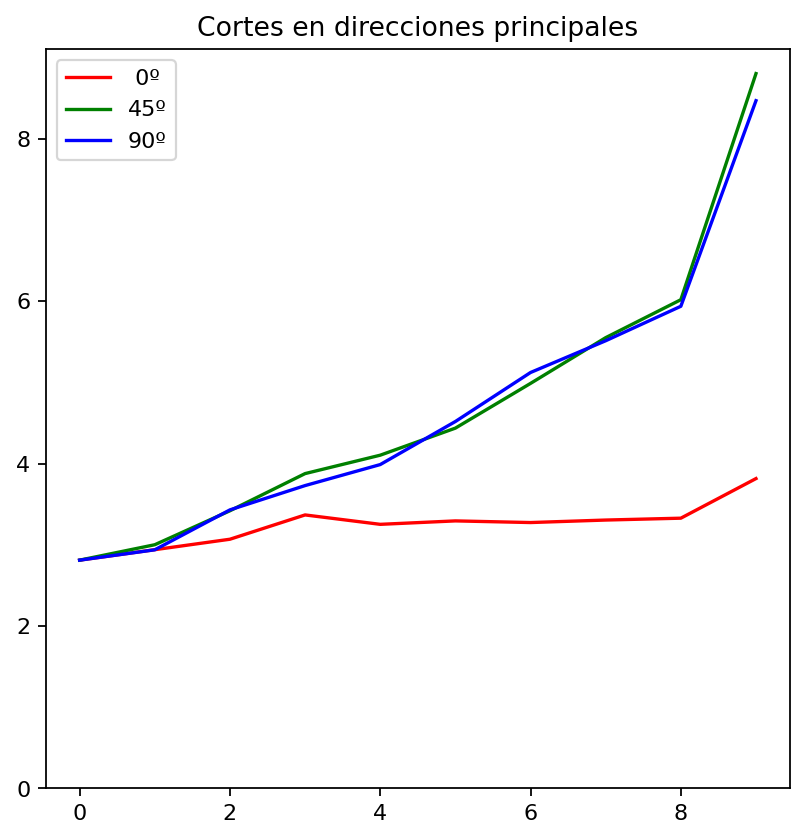

In [9]:
num_x = num_x_cielo_sunny 
num_y =num_y_cielo_sunny
imagen = cielosunny
num_sensors= num_y * num_x
sensors = np.zeros((num_sensors, 4), dtype=float)
positions = np.zeros((num_sensors, 2), dtype=float)
x = np.arange(num_x)
y = np.arange(num_y)
X, Y = np.meshgrid(x, y)
x = X.flatten()
y = Y.flatten()
z=imagen.flatten()
sensors[:, 0] = x
sensors[:, 1] = y
sensors[:, 2] = z
sensors[:, 3] = 0.5 * np.ones_like(x)
sensors[:, 2] = sensors[:, 2] + sensors[:, 3] * np.random.randn(num_sensors)
positions = np.zeros((num_sensors, 2), dtype=float)
positions[:, 0] = x
positions[:, 1] = y
hx_var=np.arange((num_x/2))
hy_var=np.arange((num_y/2))
var_2d = experimental(sensors=sensors)
variogram, num_data = var_2d.compute(hx_var, hy_var, remove_origin=True, has_draw=True)
